In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cp /content/drive/MyDrive/CSVs/* ./

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [9]:
from pandas_datareader import data as pdr
from datetime import datetime

In [178]:
df = pd.read_csv('/content/ITC_stock.csv')

In [179]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,283.549988,279.799988,282.200012,282.700012,2490548.0,250.739075
1,2019-01-02,283.250000,277.549988,282.250000,280.600006,9934187.0,248.876465
2,2019-01-03,282.450012,277.750000,280.600006,278.850006,6114946.0,247.324326
3,2019-01-04,282.950012,279.149994,279.149994,280.950012,7805148.0,249.186951
4,2019-01-07,285.250000,281.000000,284.299988,281.649994,9757529.0,249.807800


In [180]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
237,2019-12-24,240.199997,238.199997,239.000000,238.750000,7896150.0,215.814545
238,2019-12-26,239.399994,236.350006,238.899994,236.800003,14460325.0,214.051880
239,2019-12-27,238.449997,236.449997,237.500000,236.899994,8712539.0,214.142242
240,2019-12-30,240.899994,237.500000,238.000000,238.199997,13173134.0,215.317352
241,2019-12-31,238.949997,237.399994,238.550003,237.699997,7142051.0,214.865402


In [181]:
close = df['Close']
print(close)

0      282.700012
1      280.600006
2      278.850006
3      280.950012
4      281.649994
          ...    
237    238.750000
238    236.800003
239    236.899994
240    238.199997
241    237.699997
Name: Close, Length: 242, dtype: float64


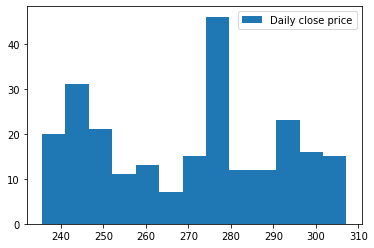

In [182]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

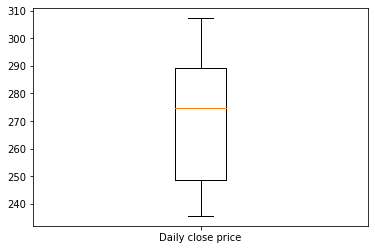

In [183]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

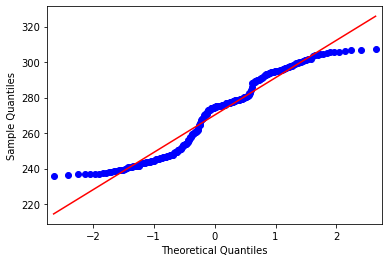

In [184]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [185]:
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))

Mean is:  270.13243746166387
Standard deviation is:  21.079839202468193
Median is:  274.7250061035156


In [186]:
print("Skewness of the distribution is: ", stats.skew(close))

Skewness of the distribution is:  -0.015001721625256606


In [187]:
print("Skewtest of the distribution is: ", stats.skewtest(close))

Skewtest of the distribution is:  SkewtestResult(statistic=-0.09802390454728983, pvalue=0.9219133116911017)


In [188]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))

Kurtosis of the distributionn is:  -1.2545599900515114


In [189]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=-13.067305779778515, pvalue=5.0627040429065125e-39)


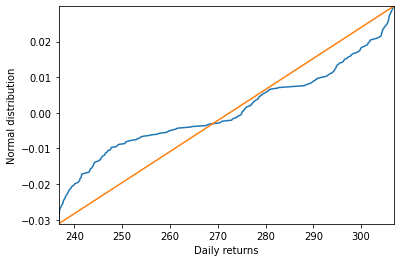

In [190]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

## Daily Return

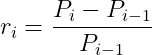

In [191]:
## Daily Return
returns = close.pct_change(1).dropna()
print(returns)

1     -0.007428
2     -0.006237
3      0.007531
4      0.002491
5      0.009231
         ...   
237   -0.000628
238   -0.008168
239    0.000422
240    0.005488
241   -0.002099
Name: Close, Length: 241, dtype: float64


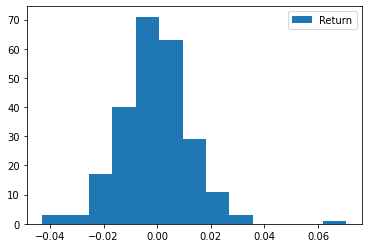

In [192]:
plt.hist(returns, bins="rice", label="Return")
plt.legend()
plt.show()

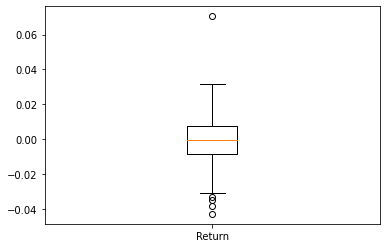

In [193]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

In [194]:
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))

Mean is:  -0.0006334093490607351
Standard deviation is:  0.013110447550456216
Median is:  -0.0006278522407555664


In [195]:
print("Skewness of the distribution is: ", stats.skew(returns))

Skewness of the distribution is:  0.3984621412179505


In [196]:
print("Skewtest of the distribution is: ", stats.skewtest(returns))

Skewtest of the distribution is:  SkewtestResult(statistic=2.512609271296291, pvalue=0.01198419848679621)


In [197]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))

Kurtosis of the distributionn is:  3.2911573661183864


In [198]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=4.9096515058488, pvalue=9.12383872786853e-07)


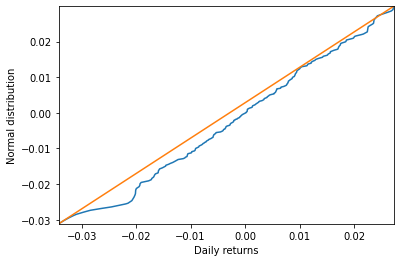

In [199]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

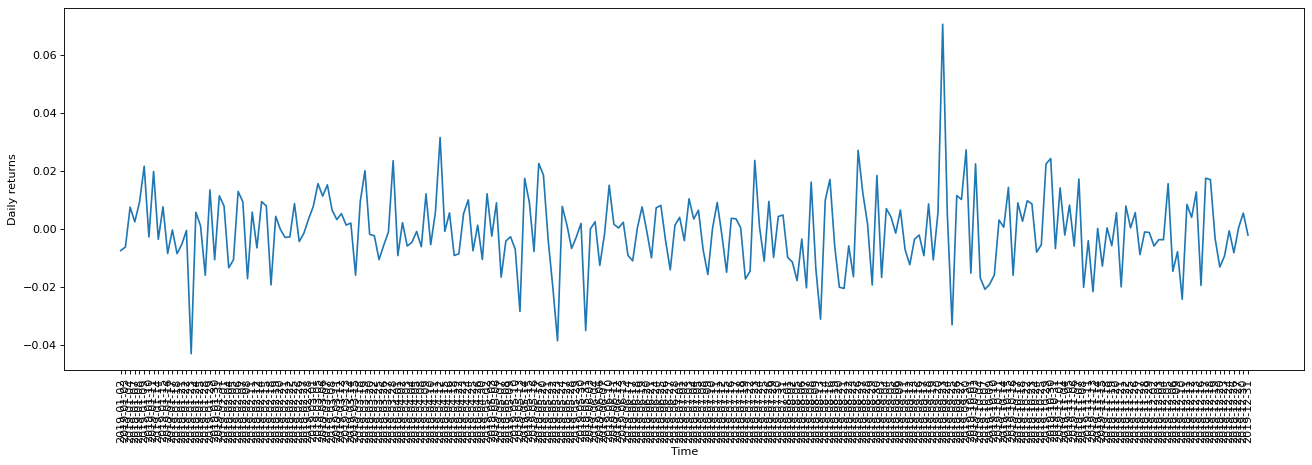

In [176]:
## Volatility of the distribution curve.
## Look at the original time series
plt.figure(figsize=(20, 6), dpi=80)
dates= df["Date"][1:]
data=[[i,j] for i,j in zip(dates,returns)]
plt.plot(dates,returns)
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

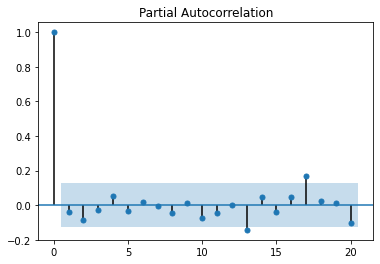

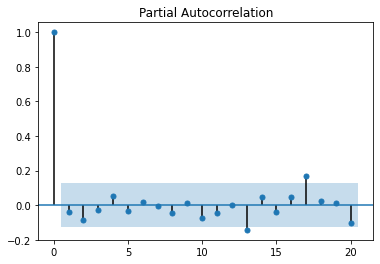

In [177]:
## Auto correlation function
plot_pacf(returns,lags=20)